In [1]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# This is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# This formats our plots nicely
pd.options.display.mpl_style = 'default'

# This allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
# Read data into a DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/colby-schrauth/DataScience/master/SLR/Data/monthly_metrics.csv')

In [3]:
# Rename columns
df.columns = ['Date', 'Page Views', 'Visits']

In [4]:
# Create two new columns that slice the year and month of the 'Date' column
df['Year'] = df.Date.str[-4:]
df['Month'] = df.Date.str[3:5]

In [5]:
# Delete 'Date' column
del df['Date']

In [6]:
# Get a list of columns
cols = list(df)

# Move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Year')))
cols.insert(1, cols.pop(cols.index('Month')))

# Use ix to reorder
df = df.ix[:, cols]

In [7]:
# Keep only the Page Views and Visits columns
df = df[['Page Views', 'Visits']]

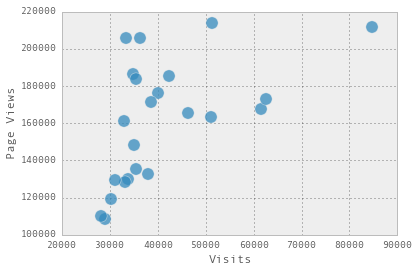

In [10]:
# Visualize the relationship between the features and the response using scatterplots
df.plot(kind='scatter', x='Visits', y='Page Views', s=150, alpha=.75)

In [11]:
df.rename(columns={'Page Views':'PageViews'}, inplace=True)

In [12]:
# create a fitted model in one line
lm = smf.ols(formula='PageViews ~ Visits', data=df).fit()

# print the coefficients
lm.params

Intercept    107685.782285
Visits            1.308031
dtype: float64

**Interpreting Model Coefficients**
How do we interpret the Visits coefficient ($\beta_1$)?

In [ ]:
feature_cols = ['Visits']
X = pd.DataFrame(df[feature_cols])
y = pd.DataFrame(df['Page Views'])

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X, y)

In [ ]:
# print intercept and coefficients
print lm.intercept_
print lm.coef_

In [ ]:
# pair the feature names with the coefficients
zip(feature_cols, lm.coef_)

In [ ]:
# predict for a new observation
lm.predict(95000)

In [ ]:
# calculate the R-squared
lm.score(X, y)